In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from tqdm.notebook import tqdm
import random
import matplotlib.pyplot as plt
from torchvision import models
import numpy as np
import random
from colour.io.luts.iridas_cube import read_LUT_IridasCube
import os
from torchvision.io import read_image
import torchvision

In [5]:

class RandomStyleTransformationWithColorJitter:
    def __init__(self, brightness=(0.1,2.0), contrast=(0.1,2.0), saturation=(0.1,2.0), hue=(-0.5,0.5)):
        self.brightness = brightness
        self.contrast = contrast
        self.saturation = saturation
        self.hue = hue

    def apply_color_jitter(self, images, params):
        
        transformed_images = TF.adjust_brightness(images, params[0])
        transformed_images = TF.adjust_contrast(transformed_images, params[1])
        transformed_images = TF.adjust_saturation(transformed_images, params[2])
        transformed_images = TF.adjust_hue(transformed_images, params[3])

        return transformed_images

    def __call__(self):
        params = np.random.uniform([self.brightness[0],self.contrast[0],self.saturation[0],self.hue[0]],[self.brightness[1],self.contrast[1],self.saturation[1],self.hue[1]])
        def f(images):
            return self.apply_color_jitter(images,params)
        return f

In [17]:
def plot_image_3d(image, subplot, dots=10_000):
    """Plots the 3D scatter plot of the image."""
    # Convert image into numpy array
    img_array = np.array(image) / 255
    r, g, b = img_array[:, :, 0].flatten(), img_array[:, :, 1].flatten(), img_array[:, :, 2].flatten()
    idxes = np.random.randint(0, len(r), dots)
    colors = img_array.reshape(-1, 3)

    # Plotting
    subplot.scatter(r[idxes], g[idxes], b[idxes], c=colors[idxes], alpha=0.5, s=1)

def plot_comparison(content_im, img_transferred_simple, img_transferred_cnf, style_im):
    """Plots the comparison between images and their 3D scatter plots."""
    fig = plt.figure(figsize=(30, 15))
    images = [content_im, img_transferred_simple, img_transferred_cnf, style_im]
    titles = ['Random uniform', 'Random uniform with ColorJitter', 'Original Image', 'Original Image with ColorJitter']

    for i in range(4):
        ax = fig.add_subplot(2, 4, i + 1)
        ax.imshow(images[i])
        ax.set_title(titles[i])
        ax.axis('off')

    for i in range(4):
        ax = fig.add_subplot(2, 4, i + 5, projection='3d')
        plot_image_3d(images[i], ax)
        ax.set_title(titles[i])
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')
        ax.view_init(elev=30, azim=347)
    
    plt.tight_layout()
    plt.show()
    
def plot_color_jitter_comparison(original_image_path, transform):
    # Generate an image with uniform distribution 
    random_img = np.random.uniform(0, 256, size=(256, 256, 3))
    sc = 3  # Introduced some 'unpooling' to neglect comparison defects
    random_img = np.kron(random_img, np.ones((sc, sc, 1)))
    random_img = Image.fromarray(np.uint8(random_img))
    original = Image.open(original_image_path)
    img_process = transform(random_img)
    original_process = transform(original)
    plot_comparison(random_img, img_process, original, original_process)

In [18]:
# Read the image
# img = Image.open('data/images/1674921468776855 (2).jpeg')
# define a transform
transform = RandomStyleTransformationWithColorJitter()

In [19]:
t1 = transform()
t2 = transform()

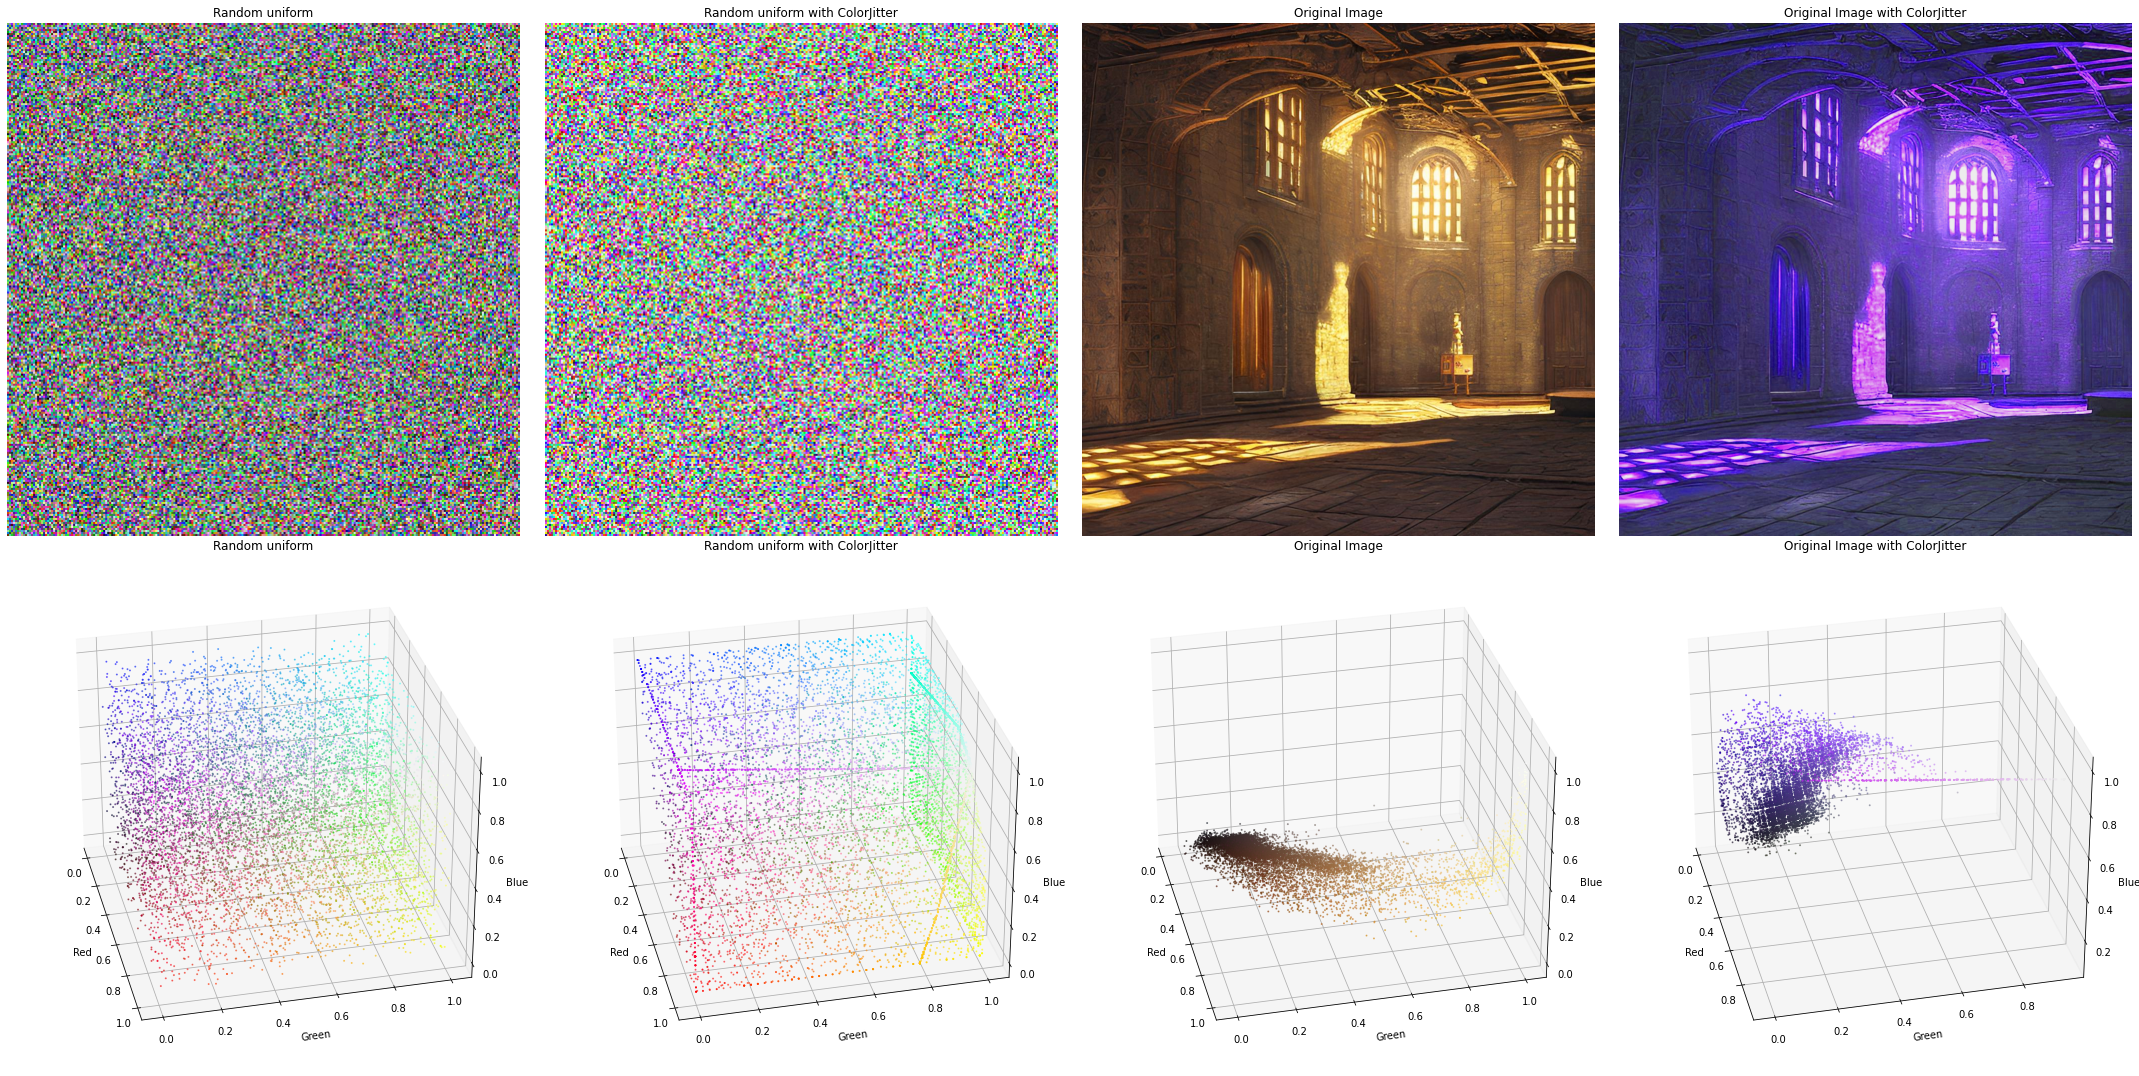

In [20]:
plot_color_jitter_comparison('data/images/1674921468776855 (2).jpeg',t1)

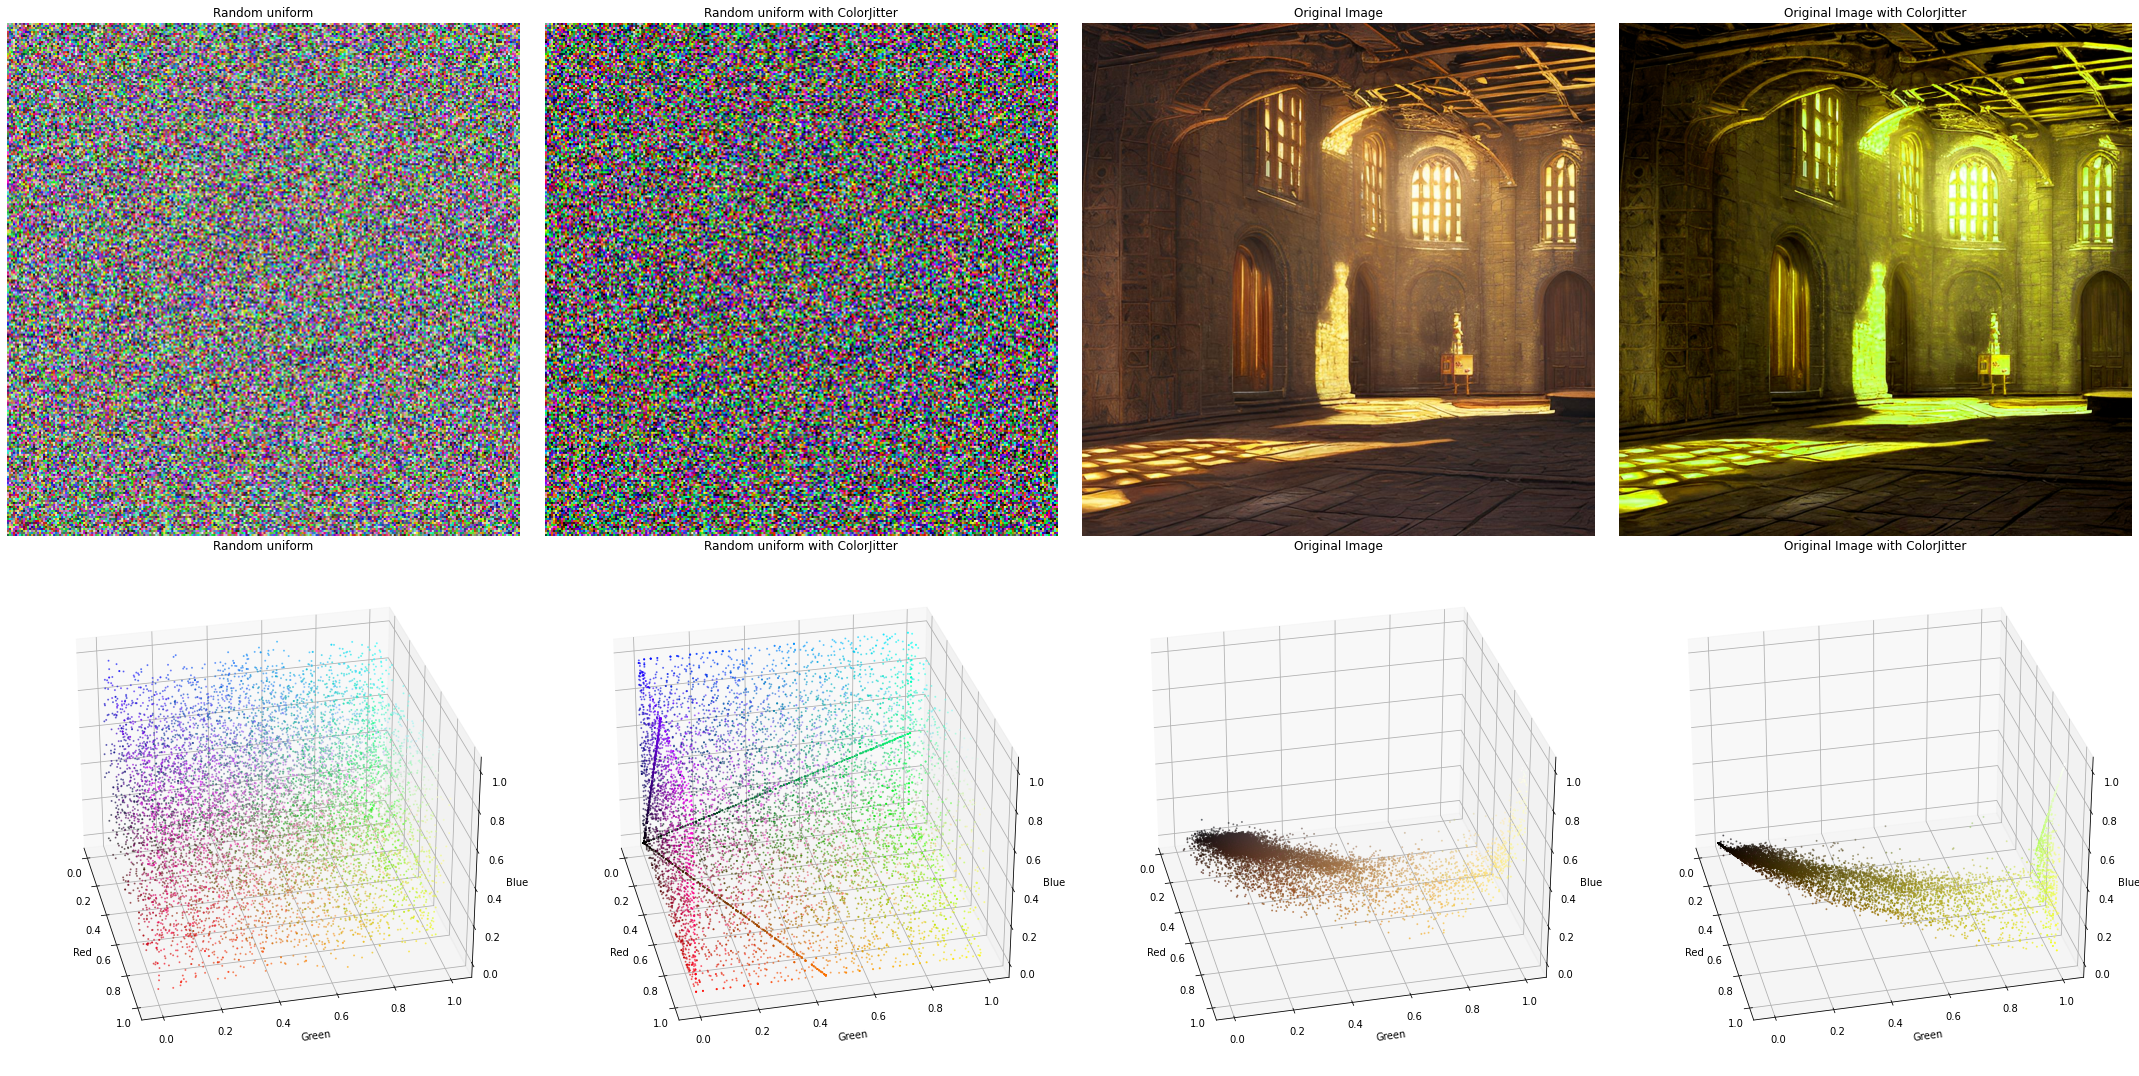

In [21]:
plot_color_jitter_comparison('data/images/1674921468776855 (2).jpeg',t2)